# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,0.429630,0.463768,15.000000,12.027746,2,31,84.333333,73.721699,8,184,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,0.345679,0.350282,9.000000,5.715476,2,16,39.333333,25.328947,9,71,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,0.050000,0.073034,10.000000,1.000000,9,11,44.500000,6.500000,38,51,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.179487,0.173824,26.000000,9.273618,13,34,108.666667,38.732702,54,139,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.166667,0.202834,33.333333,10.964589,18,43,149.000000,56.166419,75,211,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
975,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
976,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
977,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [5]:
csop_model.select_target(target = "zscore_efficiency")

In [6]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.391	MAE: 0.5238	MSE: 0.5876	RMSE: 0.7666
Validation Set:	R2: 0.2157	MAE: 0.7303	MSE: 1.0228	RMSE: 1.0113
Test Set:	R2: 0.1657	MAE: 0.6901	MSE: 0.8326	RMSE: 0.9125


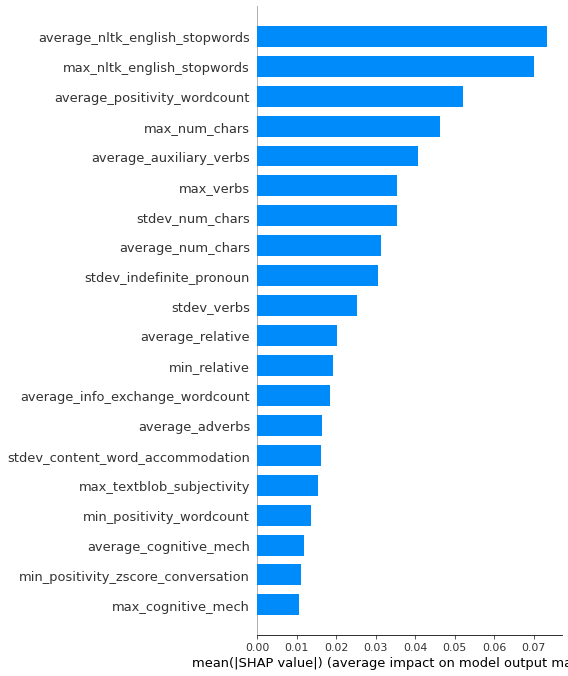

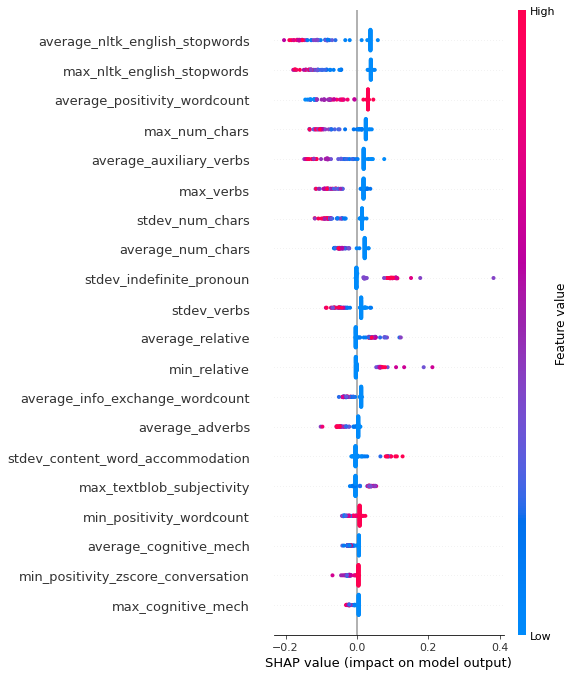

In [7]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [8]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [9]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3913	MAE: 0.5186	MSE: 0.6	RMSE: 0.7746
Validation Set:	R2: 0.2005	MAE: 0.698	MSE: 0.8404	RMSE: 0.9167
Test Set:	R2: 0.2489	MAE: 0.6367	MSE: 0.8021	RMSE: 0.8956


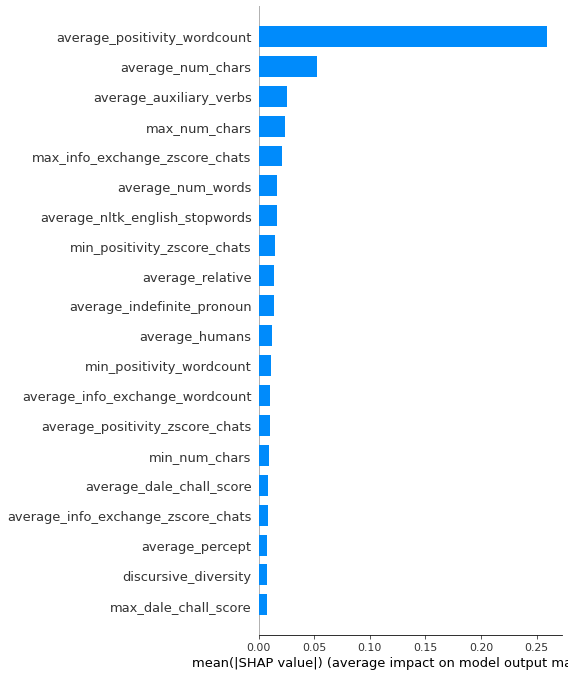

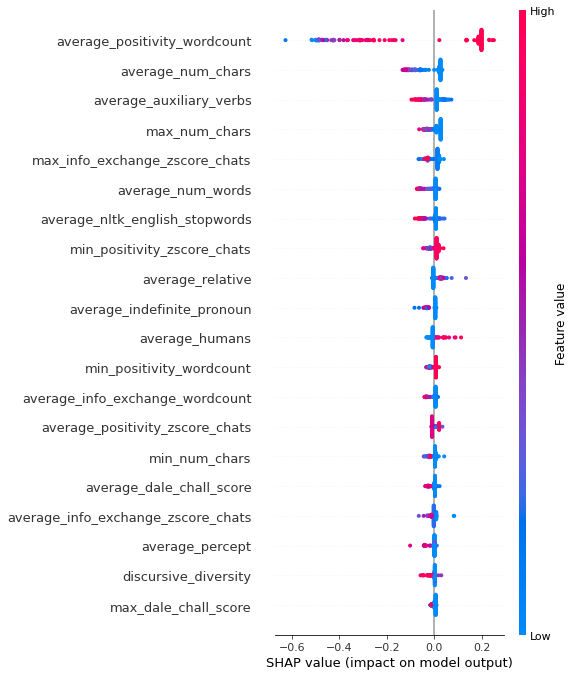

In [10]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

### Emily Checking Train-Test Split Functionality

In [11]:
csop_blended_model.X_train

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
77,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
810,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
492,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1302,-0.683550,-0.702955,-0.448431,-0.472877,-0.295350,-0.466248,-0.475164,-0.477907,-0.333203,-0.481858,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
235,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,0.941512,0.965020,2.041247,2.023350,1.924977,2.506158,1.878049,1.889278,1.726921,2.231004,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
112,2.329465,2.084487,-0.173328,0.257705,-0.412209,0.022367,-0.142448,0.231814,-0.359280,0.029006,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
805,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
412,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0


In [12]:
csop_blended_model.X_val

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
1275,2.445350,2.392731,0.342489,1.238502,-0.295350,0.918161,0.519205,1.590171,-0.254970,1.218085,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
598,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1211,-0.683550,-0.702955,-0.448431,-0.472877,-0.295350,-0.466248,-0.475164,-0.477907,-0.333203,-0.481858,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1330,-0.683550,-0.702955,-0.448431,-0.472877,-0.295350,-0.466248,-0.475164,-0.477907,-0.333203,-0.481858,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
197,-0.683550,-0.702955,0.239326,-0.472877,0.873243,-0.059069,0.401998,-0.477907,1.179293,0.029006,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.236565,-0.449642,0.055924,-0.313451,0.405806,-0.099787,0.144899,-0.374904,0.605588,-0.085498,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1400,1.551379,1.435341,1.580450,2.403190,0.522665,1.651082,1.528697,2.261197,0.527355,1.561597,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
646,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1195,3.051174,2.856518,2.768740,6.745136,-0.295350,6.211486,2.759580,6.625196,-0.254970,6.229833,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0


In [13]:
csop_blended_model.X_test

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
892,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1105,-0.170616,-0.260237,3.609331,0.805375,5.430757,2.343287,2.738575,0.416775,4.360750,1.676101,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
413,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
522,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1036,0.359416,0.785256,-0.482818,-0.408964,-0.412209,-0.466248,-0.475164,-0.395321,-0.411435,-0.455434,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.683550,-0.702955,-0.379655,-0.472877,-0.178491,-0.425530,-0.369300,-0.477907,-0.150660,-0.420202,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
101,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
1092,-0.683550,-0.702955,-0.448431,-0.472877,-0.295350,-0.466248,-0.475164,-0.477907,-0.333203,-0.481858,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0
411,-0.683550,-0.702955,-0.517206,-0.472877,-0.412209,-0.506966,-0.520535,-0.477907,-0.411435,-0.508282,...,0.0,-2.220446e-16,-2.220446e-16,-1.110223e-16,0.0,0.0,0.0,0.0,-5.551115e-17,0.0


# Juries Model

In [11]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [12]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8625	MAE: 0.3252	MSE: 0.1418	RMSE: 0.3766
Validation Set:	R2: -0.075	MAE: 0.7765	MSE: 0.8238	RMSE: 0.9076
Test Set:	R2: 0.1239	MAE: 0.7152	MSE: 0.7548	RMSE: 0.8688


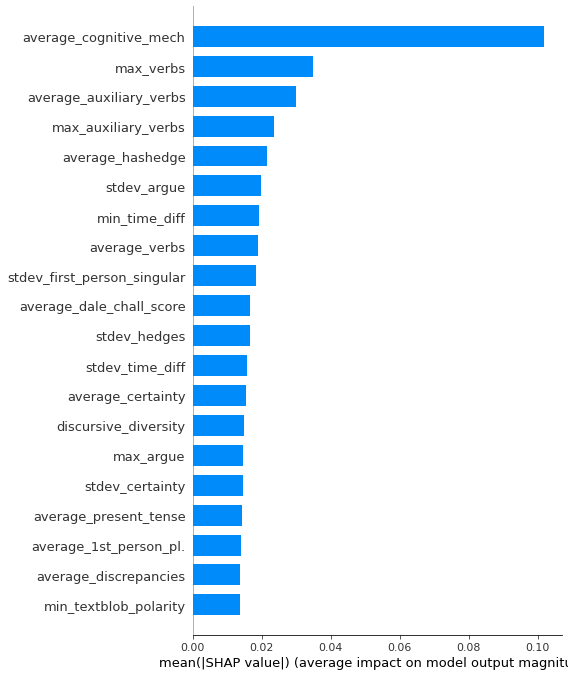

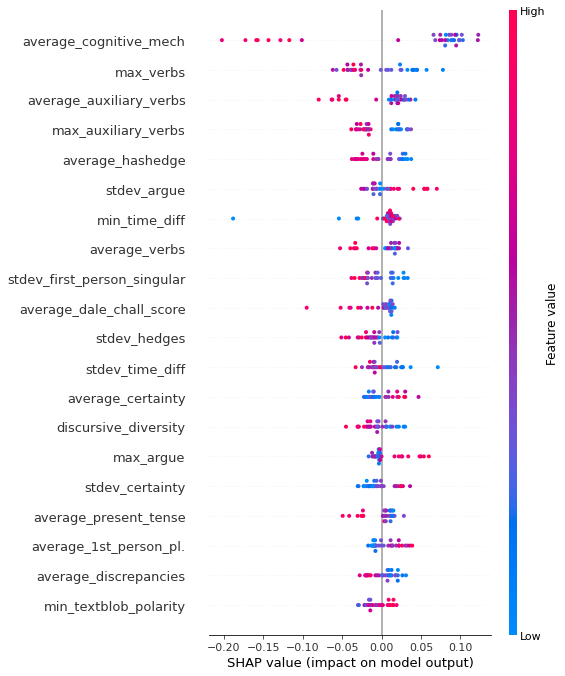

In [13]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [14]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [15]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [16]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,0.159463,0.166055,107.000000,33.948490,30,140,536.625000,168.104088,183,725,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,0.125695,0.124663,109.833333,28.457083,76,169,576.666667,151.855926,433,903,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,0.224885,0.220860,66.428571,27.338393,18,114,346.142857,141.756762,124,619,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.261432,0.248455,86.600000,42.898019,25,159,446.600000,211.715469,122,789,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,0.113767,0.106352,132.200000,28.237564,103,183,677.000000,140.125658,543,934,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,0.000000,0.000000,1.000000,0.000000,1,1,3.000000,0.000000,3,3,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,76.599130,-0.959289
2099,0.333333,0.371585,14.666667,9.568467,6,28,61.000000,44.452222,21,123,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,0.131140
2100,0.183908,0.189744,9.666667,3.299832,6,14,43.333333,15.326085,23,60,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,0.165870
2101,0.180556,0.177709,18.000000,5.958188,11,30,85.375000,27.417775,51,131,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.385957


In [17]:
# joint_model.viz_target()

## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5695	MAE: 0.3379	MSE: 0.4391	RMSE: 0.6626
Validation Set:	R2: 0.0897	MAE: 0.7299	MSE: 0.8971	RMSE: 0.9472
Test Set:	R2: 0.0461	MAE: 0.6702	MSE: 0.7822	RMSE: 0.8844


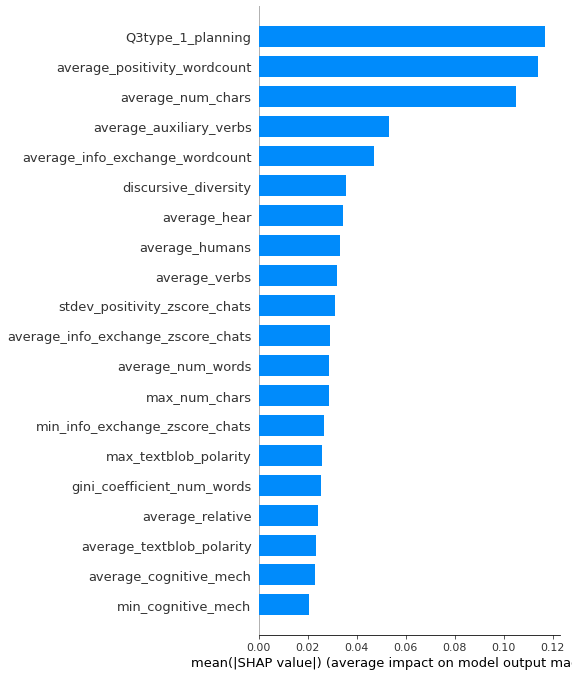

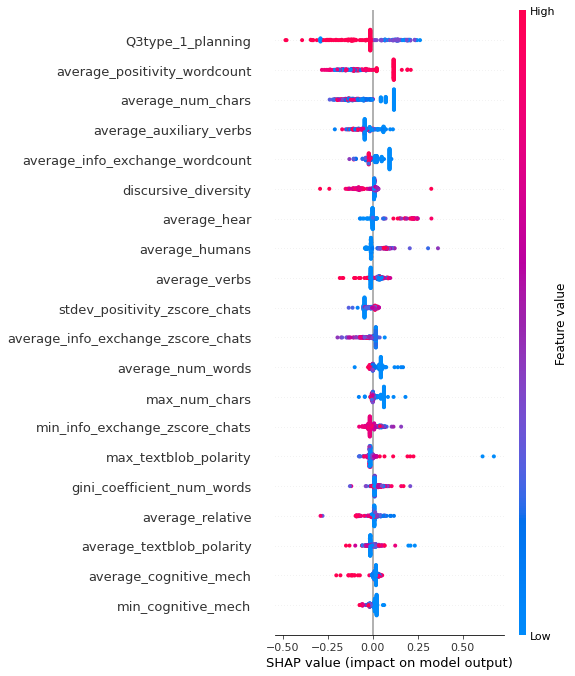

In [17]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.2049	MAE: 0.6728	MSE: 0.8111	RMSE: 0.9006
Validation Set:	R2: -0.0792	MAE: 0.8072	MSE: 1.0634	RMSE: 1.0312
Test Set:	R2: 0.0051	MAE: 0.6753	MSE: 0.8159	RMSE: 0.9033


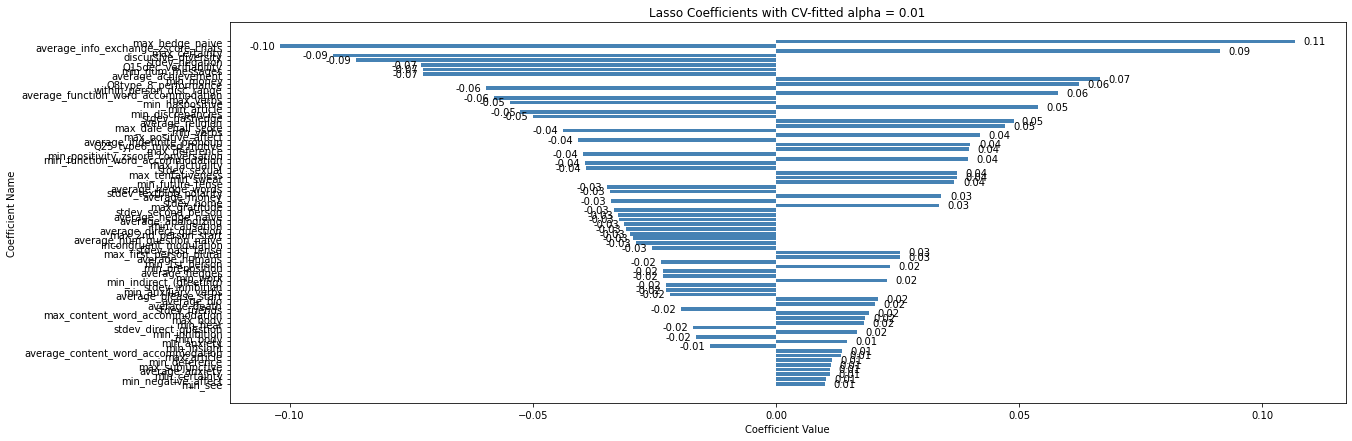

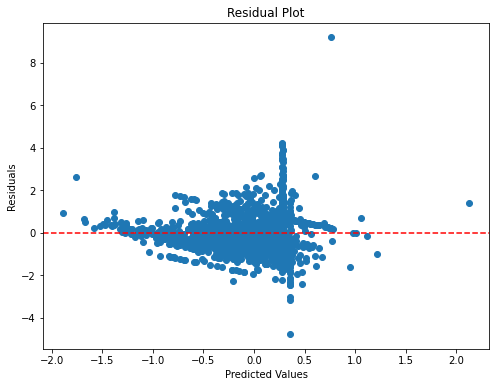

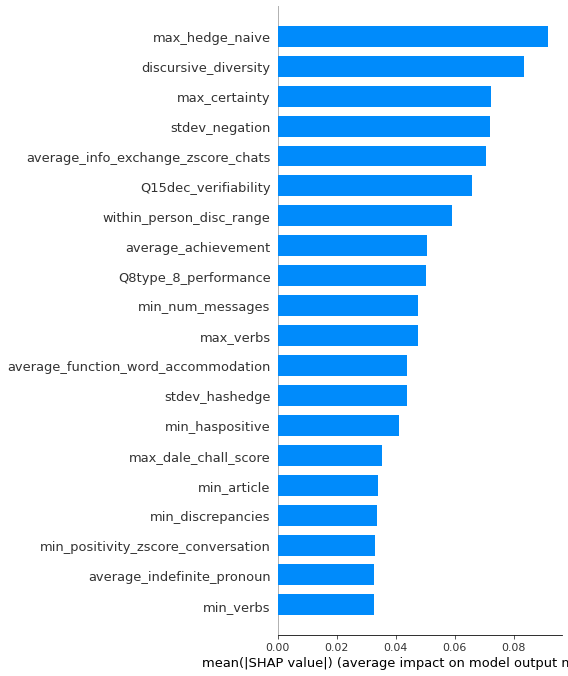

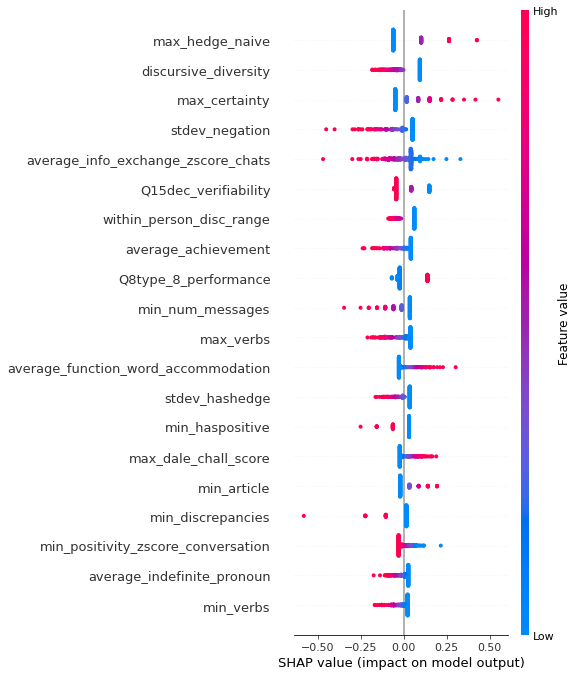

In [18]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3234	MAE: 0.6174	MSE: 0.6902	RMSE: 0.8308
Validation Set:	R2: -0.3504	MAE: 0.8997	MSE: 1.3308	RMSE: 1.1536
Test Set:	R2: -0.5436	MAE: 0.8428	MSE: 1.2658	RMSE: 1.1251


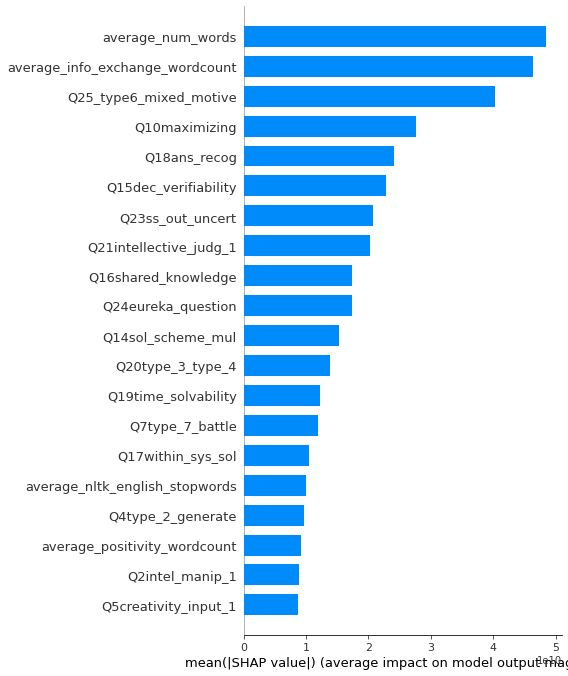

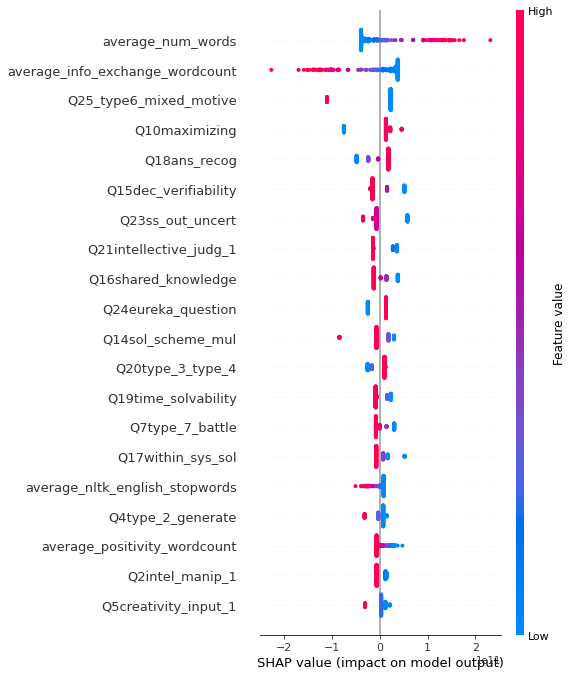

In [19]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5132	MAE: 0.457	MSE: 0.4966	RMSE: 0.7047
Validation Set:	R2: 0.1112	MAE: 0.7221	MSE: 0.8758	RMSE: 0.9358
Test Set:	R2: 0.1273	MAE: 0.6357	MSE: 0.7157	RMSE: 0.846


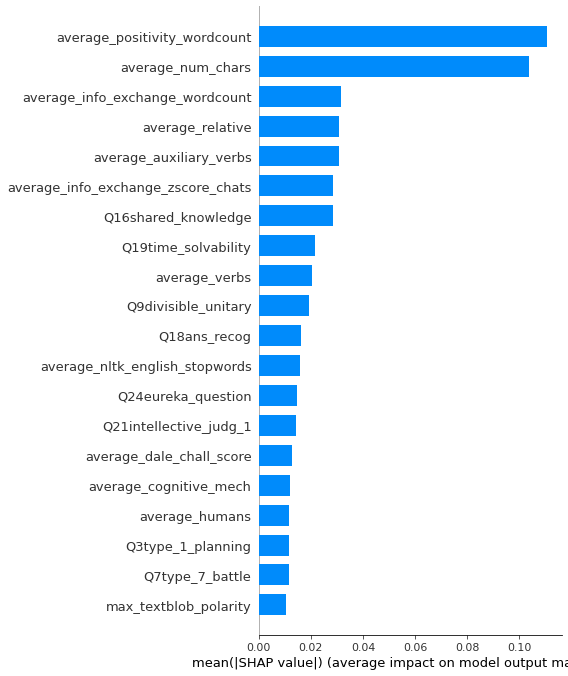

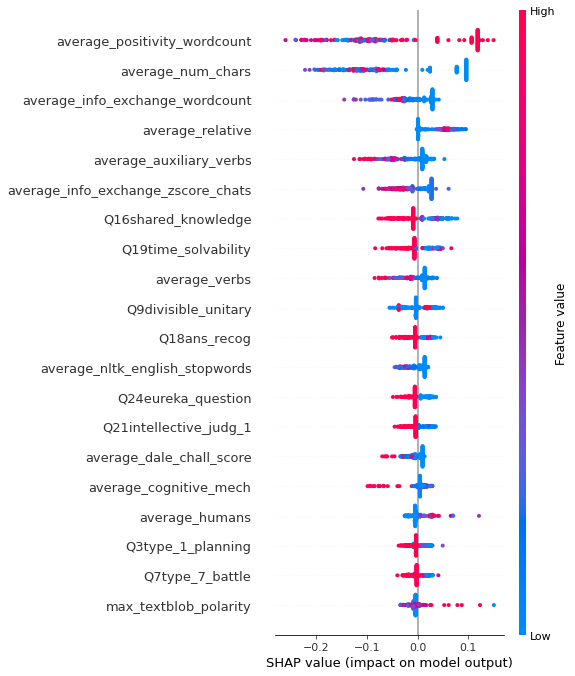

In [20]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)